# Twitter Airline Sentiments Data Set

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). The data we're providing on Kaggle is a slightly reformatted version of the original source. It includes both a CSV file and SQLite database. The code that does these transformations is available on GitHub. For example, it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines. 

[Source](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as plt
from pylab import *
from __future__ import division

In [3]:
def readcols(data):
    for i in sorted(data.columns):
        print i

In [4]:
def tidydata():
    # load the data set: tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence,
    # airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, 
    # user_timezone
    data = pd.read_csv('Tweets.csv')
    return data

In [5]:
def groupfre(dataFrame):
    arr1 = dataFrame.values
    arr2 = dataFrame.sum(axis=1) # sum across columns
    arr2 = [arr2]*3
    arr2 = np.transpose(arr2)   
    arr1.astype(float)
    arr2.astype(float)
    perct = arr1/arr2
    return perct

#Data visualization
## Count sentiments by airlines

In [6]:
data = tidydata()
al_grouped = data.groupby(['airline','airline_sentiment'])
al_grouped['airline_sentiment'].count()
alsent_cnt = al_grouped['airline_sentiment'].count()
alsent_cnt = alsent_cnt.unstack()

In [7]:
# show result
alsent_cnt

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


##Number of tweets for all airlines & pie plot

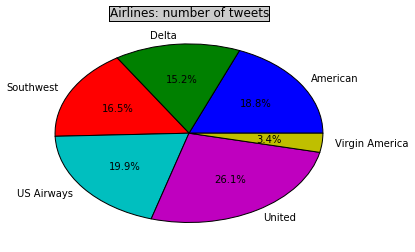

In [9]:
alsent_cnt_sum = alsent_cnt.sum(axis=1)
airlines_names = alsent_cnt_sum.index
pie(alsent_cnt_sum.values,labels=airlines_names,autopct='%1.1f%%')
title('Airlines: number of tweets', bbox={'facecolor':'0.8', 'pad':2})
show()

## Types of tweets for each airline & bar plot

## In absolute values

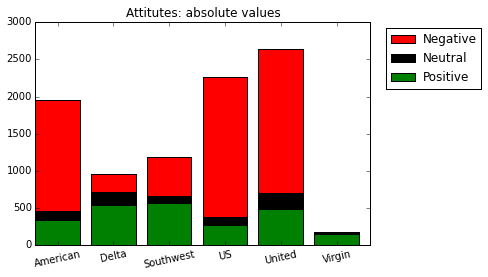

In [40]:
#ind = np.arange(6) # locations for groups
ind1 = [0.4,1.4,2.4,3.4,4.4,5.4]
ind2 = [0,1,2,3,4,5]
width = 0.35 # width of bars
p1 = plt.bar(ind2,alsent_cnt['negative'],color='r')
p2 = plt.bar(ind2,alsent_cnt['neutral'],color='k')
p3 = plt.bar(ind2,alsent_cnt['positive'],color='g')    
plt.xticks(ind1,('American','Delta','Southwest','US', 'United', 'Virgin'),rotation=12)
plt.legend((p1[0], p2[0], p3[0]),('Negative','Neutral','Positive'),bbox_to_anchor=(1.35, 1.00))
plt.title('Attitutes: absolute values')
plt.show()

###In percentages

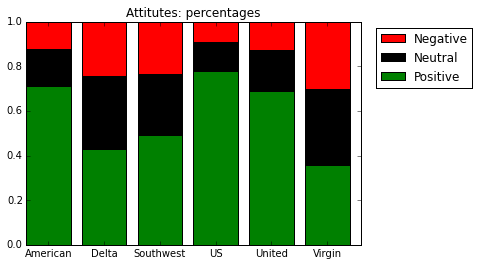

In [39]:
ind_ticks = [0.4,1.4,2.4,3.4,4.4,5.4]
ind_bar = [0,1,2,3,4,5]
pert = groupfre(alsent_cnt)
pert_cum = pert.cumsum(axis=1)
p4 = plt.bar(ind_bar,pert_cum[:,2],color='r')
p5 = plt.bar(ind_bar,pert_cum[:,1],color='k')
p6 = plt.bar(ind_bar,pert_cum[:,0],color='g')
plt.xticks(ind_ticks,('American','Delta','Southwest','US', 'United', 'Virgin'))
plt.legend((p1[0], p2[0], p3[0]),('Negative','Neutral','Positive'),bbox_to_anchor=(1.35, 1.00))
plt.title('Attitutes: percentages')
plt.show()